# Classification Tree using rpart library

## Using rpart built-in dataset kyphosis
- The kyphosis data frame has 81 rows and 4 columns, representing data on children who have had corrective spinal surgery

In [1]:
library(rpart)
library(rpart.plot)

## Kyphosis Variable represents if Kyphosis is still present after corrective surgery
- Age is in months
- Number of vertebrae affected
- Start - top most vertabrae in the operation

In [2]:
head(kyphosis)

Kyphosis,Age,Number,Start
absent,71,3,5
absent,158,3,14
present,128,4,5
absent,2,5,1
absent,1,4,15
absent,1,2,16


In [3]:
str(kyphosis)

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


## Build a Classification Model on Kyphosis based on Age, Number and Start Variables
- Set the method explicitly to "class" for classification 

In [4]:
modelFit <- rpart(Kyphosis ~ Age + Number + Start, data = kyphosis, method = "class")
modelFit

n= 81 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 81 17 absent (0.79012346 0.20987654)  
   2) Start>=8.5 62  6 absent (0.90322581 0.09677419)  
     4) Start>=14.5 29  0 absent (1.00000000 0.00000000) *
     5) Start< 14.5 33  6 absent (0.81818182 0.18181818)  
      10) Age< 55 12  0 absent (1.00000000 0.00000000) *
      11) Age>=55 21  6 absent (0.71428571 0.28571429)  
        22) Age>=111 14  2 absent (0.85714286 0.14285714) *
        23) Age< 111 7  3 present (0.42857143 0.57142857) *
   3) Start< 8.5 19  8 present (0.42105263 0.57894737) *

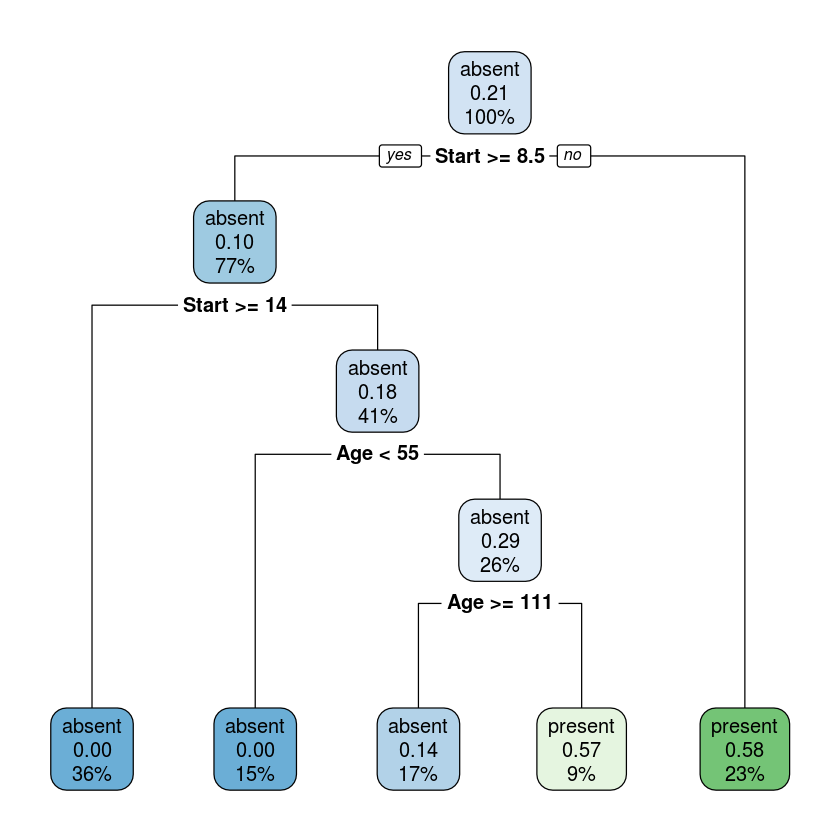

In [5]:
# Plot to see the Decision Tree using the rpart.plot package
rpart.plot(modelFit)

<hr>

# Regression Tree using rpart library

## Using rpart built-in dataset car90 and cu.summary (subset of car90 dataset)
- Data on 111 cars of the April 1990 Consumer Reports Magazine

In [6]:
head(cu.summary)

,Price,Country,Reliability,Mileage,Type
Acura Integra 4,11950,Japan,Much better,NA,Small
Dodge Colt 4,6851,Japan,NA,NA,Small
Dodge Omni 4,6995,USA,Much worse,NA,Small
Eagle Summit 4,8895,USA,better,33,Small
Ford Escort 4,7402,USA,worse,33,Small
Ford Festiva 4,6319,Korea,better,37,Small


In [9]:
str(cu.summary)

'data.frame':	117 obs. of  5 variables:
 $ Price      : num  11950 6851 6995 8895 7402 ...
 $ Country    : Factor w/ 10 levels "Brazil","England",..: 5 5 10 10 10 7 5 6 6 7 ...
 $ Reliability: Ord.factor w/ 5 levels "Much worse"<"worse"<..: 5 NA 1 4 2 4 NA 5 5 2 ...
 $ Mileage    : num  NA NA NA 33 33 37 NA NA 32 NA ...
 $ Type       : Factor w/ 6 levels "Compact","Large",..: 4 4 4 4 4 4 4 4 4 4 ...


In [8]:
# Build Regression Tree Model for the Price based on Mileage, Type, Country and Reliability of the car
modelFit <- rpart(Price ~ Mileage + Type + Country + Reliability, data = cu.summary, method = "anova")
modelFit

n= 117 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 117 7407473000 15743.460  
   2) Type=Compact,Small,Sporty,Van 80 3322389000 13035.010  
     4) Country=Brazil,France,Japan,Japan/USA,Korea,Mexico,USA 69 1426421000 11555.160  
       8) Type=Small 21   50309830  7629.048 *
       9) Type=Compact,Sporty,Van 48  910790000 13272.830  
        18) Country=Japan/USA,Mexico,USA 29  482343500 12241.550 *
        19) Country=France,Japan 19  350528000 14846.890 *
     5) Country=Germany,Sweden 11  797004200 22317.730 *
   3) Type=Large,Medium 37 2229351000 21599.570  
     6) Country=France,Korea,USA 25 1021102000 18697.280  
      12) Type=Medium 18  741101600 17607.440 *
      13) Type=Large 7  203645100 21499.710 *
     7) Country=England,Germany,Japan,Sweden 12  558955000 27646.000 *

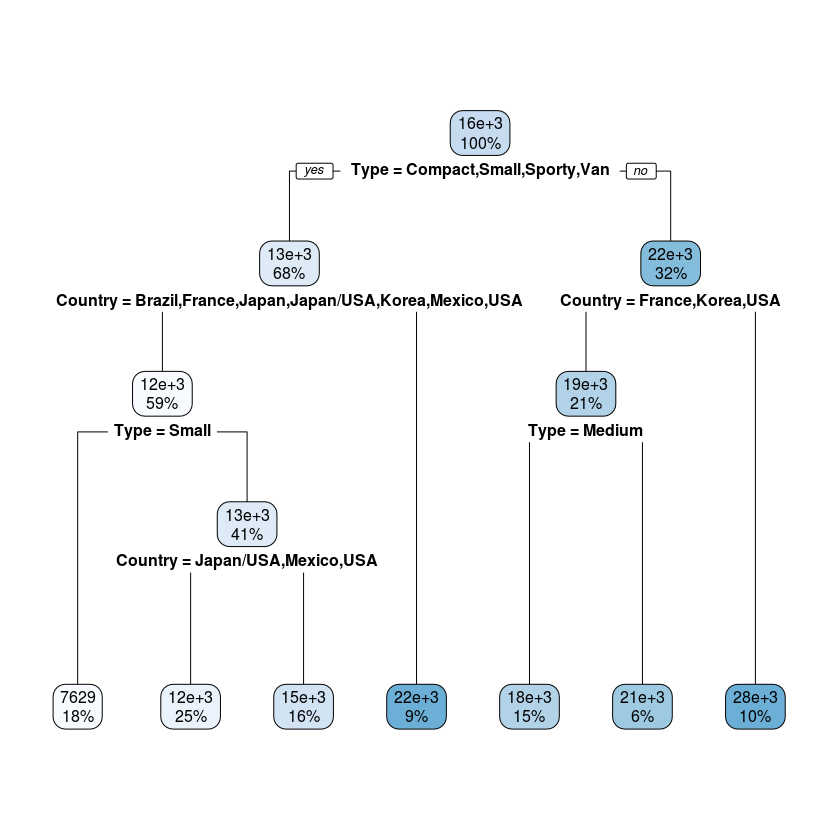

In [10]:
# Plot to see the Decision Tree using the rpart.plot package
rpart.plot(modelFit)